In [9]:
from IPython.display import Image
from glob import glob
import pandas as pd
import numpy as np
import os
from pathlib import Path
import subprocess
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [10]:
#os.environ["PYSPARK_GATEWAY_PORT"]=45323
#os.environ["PYSPARK_GATEWAY_SECRET"]=1f5c85fdccaec5212a9cb3beadf12b67308ab20df4a4a43b00c0d91e7c6c6855
#os.environ["PYSPARK_PIN_THREAD"]=true

spark = SparkSession.builder.appName('MastersProject').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/03 17:28:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [11]:
taxon = '\"Escherichia coli\"'
pwd = "/home/infosebi/Documents/MastersProject"
number_of_genomes=5

In [25]:
os.chdir(pwd)
taxon_file = taxon.lower().replace(" ", "_").replace("\'", "")
subprocess.run(f"""ncbi-datasets summary genome taxon {str(taxon)} --assembly-level complete --assembly-source genbank --annotated>  {taxon_file}.json""", shell=True)
p = subprocess.Popen(f"""jq '.total_count' {taxon_file}.json""", stdout=subprocess.PIPE, shell=True)
print(p.stdout.read().decode('ascii').strip())

New version of client (14.19.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/linux-amd64/datasets


3048


In [26]:
subprocess.run(f"cat {taxon_file}.json | jq -r '.reports[] | [.accession, .organism.infraspecific_names.strain, .organism.tax_id, .assembly_stats.total_sequence_length, .assembly_stats.gc_count, .assembly_stats.contig_n50, .annotation_info.stats.gene_counts.total] | @tsv' | head -{number_of_genomes} > info_table.tsv", shell=True) 

CompletedProcess(args='cat "escherichia_coli".json | jq -r \'.reports[] | [.accession, .organism.infraspecific_names.strain, .organism.tax_id, .assembly_stats.total_sequence_length, .assembly_stats.gc_count, .assembly_stats.contig_n50, .annotation_info.stats.gene_counts.total] | @tsv\' | head -5 > info_table.tsv', returncode=0)

In [27]:
subprocess.run(f"cat {taxon_file}.json | jq -r '.reports[]| .accession' | head -{number_of_genomes} > accession_list.txt", shell=True)

CompletedProcess(args='cat "escherichia_coli".json | jq -r \'.reports[]| .accession\' | head -5 > accession_list.txt', returncode=0)

In [28]:
subprocess.run(f"ncbi-datasets download genome accession --include gbff --inputfile accession_list.txt --filename {taxon_file}.zip", shell=True)

New version of client (14.19.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/linux-amd64/datasets
Downloading: escherichia_coli.zip    855B 10.2MB/s
Downloading: escherichia_coli.zip    855B 10.2MB/s
Downloading: escherichia_coli.zip    855B 10.2MB/s
Downloading: escherichia_coli.zip    855B 10.2MB/s
Downloading: escherichia_coli.zip    3.94kB 79.5kB/s
Downloading: escherichia_coli.zip    3.94kB 79.5kB/s
Downloading: escherichia_coli.zip    3.94kB 79.5kB/s
Downloading: escherichia_coli.zip    3.94kB 79.5kB/s
Downloading: escherichia_coli.zip    3.94kB 79.5kB/s
Downloading: escherichia_coli.zip    3.94kB 79.5kB/s
Downloading: escherichia_coli.zip    4.04kB 36.7kB/s
Downloading: escherichia_coli.zip    4.04kB 36.7kB/s
Downloading: escherichia_coli.zip    4.04kB 36.7kB/s
Downloading: escherichia_coli.zip    4.04kB 36.7kB/s
Downloading: escherichia_coli.zip    4.04kB 36.7kB/s
Downloading: escherichia_coli.zip    4.04kB 36.7kB/s
Downloading: escherichia_coli.zi

Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    65.5kB 201kB/s
Downloading: escherichia_coli.zip    98.3kB 214kB/s
Downloading: escherichia_coli.zip    131kB 281kB/s
Downloading: escherichia_coli.zip    131kB 281kB/s
Downloading: escherichia_coli.zip    131kB 281kB/s
Downloading: escherichia_coli.zip    131kB 281kB/s
Downloading: escherichia_coli.zip    131kB 281kB/s
Downloading: escherichia_coli.zip    164kB 313kB/s
Downloading: escherichia_coli.zip    164kB 313kB/s
Downloading: escher

Downloading: escherichia_coli.zip    1.67MB 1.71MB/s
Downloading: escherichia_coli.zip    1.7MB 1.74MB/s
Downloading: escherichia_coli.zip    1.7MB 1.74MB/s
Downloading: escherichia_coli.zip    1.7MB 1.74MB/s
Downloading: escherichia_coli.zip    1.7MB 1.74MB/s
Downloading: escherichia_coli.zip    1.97MB 1.91MB/s
Downloading: escherichia_coli.zip    1.97MB 1.91MB/s
Downloading: escherichia_coli.zip    1.97MB 1.91MB/s
Downloading: escherichia_coli.zip    1.97MB 1.91MB/s
Downloading: escherichia_coli.zip    2.26MB 2.11MB/s
Downloading: escherichia_coli.zip    2.65MB 2.45MB/s
Downloading: escherichia_coli.zip    2.79MB 2.56MB/s
Downloading: escherichia_coli.zip    2.79MB 2.56MB/s
Downloading: escherichia_coli.zip    2.79MB 2.56MB/s
Downloading: escherichia_coli.zip    2.79MB 2.56MB/s
Downloading: escherichia_coli.zip    2.79MB 2.56MB/s
Downloading: escherichia_coli.zip    2.79MB 2.56MB/s
Downloading: escherichia_coli.zip    2.79MB 2.56MB/s
Downloading: escherichia_coli.zip    2.79MB 2.56MB

Downloading: escherichia_coli.zip    4.49MB 3.03MB/s
Downloading: escherichia_coli.zip    4.49MB 3.03MB/s
Downloading: escherichia_coli.zip    4.49MB 3.03MB/s
Downloading: escherichia_coli.zip    4.49MB 3.03MB/s
Downloading: escherichia_coli.zip    4.49MB 3.03MB/s
Downloading: escherichia_coli.zip    4.49MB 3.03MB/s
Downloading: escherichia_coli.zip    4.75MB 2.84MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.88MB/s
Downloading: escherichia_coli.zip    4.82MB 2.

Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.

Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.79MB/s
Downloading: escherichia_coli.zip    5.28MB 2.

Downloading: escherichia_coli.zip    7.27MB 2.2MB/s
Downloading: escherichia_coli.zip    7.27MB 2.2MB/s
Downloading: escherichia_coli.zip    7.27MB 2.2MB/s
Downloading: escherichia_coli.zip    7.27MB 2.2MB/s
Downloading: escherichia_coli.zip    7.27MB 2.2MB/s
Downloading: escherichia_coli.zip    7.27MB 2.2MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s
Downloading: escherichia_coli.zip    7.44MB 2.11MB/s

Downloading: escherichia_coli.zip    9.27MB 2.35MB/s
Downloading: escherichia_coli.zip    9.27MB 2.35MB/s
Downloading: escherichia_coli.zip    9.27MB 2.35MB/s
Downloading: escherichia_coli.zip    9.31MB 2.26MB/s
Downloading: escherichia_coli.zip    9.57MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloading: escherichia_coli.zip    9.6MB 2.32MB/s
Downloa

Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.64MB/s
Downloading: escherichia_coli.zip    12.3MB 2.55MB/s
Downloading: escherichia_coli.zip    12.6MB 2.59MB/s
Downloading: escherichia_coli.zip    12.9MB 2.65MB/s
Downloading: escherichia_coli.zip    13MB 2.67MB/s
Downloading: escherichia_coli.zip    13MB 2.67MB/s
Downloading: escherichia_coli.zip    13MB 2.67MB/s
Downloading: escherichia_coli.zip    13MB 2.67MB/s
D

Downloading: escherichia_coli.zip    14.5MB 2.71MB/s
Downloading: escherichia_coli.zip    14.6MB 2.74MB/s
Downloading: escherichia_coli.zip    14.7MB 2.76MB/s
Downloading: escherichia_coli.zip    15MB 2.79MB/s
Downloading: escherichia_coli.zip    15.2MB 2.83MB/s
Downloading: escherichia_coli.zip    15.2MB 2.83MB/s
Downloading: escherichia_coli.zip    15.2MB 2.83MB/s
Downloading: escherichia_coli.zip    15.2MB 2.83MB/s
Downloading: escherichia_coli.zip    15.2MB 2.83MB/s
Downloading: escherichia_coli.zip    15.2MB 2.83MB/s
Downloading: escherichia_coli.zip    15.2MB 2.83MB/s
Downloading: escherichia_coli.zip    15.2MB 2.83MB/s
Downloading: escherichia_coli.zip    15.2MB 2.83MB/s
Downloading: escherichia_coli.zip    15.2MB 2.83MB/s
Downloading: escherichia_coli.zip    15.4MB 2.81MB/s
Downloading: escherichia_coli.zip    15.4MB 2.81MB/s
Downloading: escherichia_coli.zip    15.6MB 2.83MB/s
Downloading: escherichia_coli.zip    15.7MB 2.85MB/s
Downloading: escherichia_coli.zip    16MB 2.89MB

CompletedProcess(args='ncbi-datasets download genome accession --include gbff --inputfile accession_list.txt --filename "escherichia_coli".zip', returncode=0)

In [29]:
subprocess.run(f"unzip {taxon_file}.zip", shell=True)
subprocess.run(f"rm {taxon_file}.zip""", shell=True)

Archive:  escherichia_coli.zip
  inflating: README.md               
  inflating: ncbi_dataset/data/assembly_data_report.jsonl  
  inflating: ncbi_dataset/data/GCA_000597845.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_000599625.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_000599645.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_000599665.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_000599685.1/genomic.gbff  
  inflating: ncbi_dataset/data/dataset_catalog.json  


CompletedProcess(args='rm "escherichia_coli".zip', returncode=0)

In [30]:
df = pd.read_table("info_table.tsv", header=None)
df.columns = ['Genome', 'Strain', 'Taxonomy Id', 'Sequence length', "GC Percent (%)", "ContigN50", "Gene count"]
df.set_index("Genome", inplace = True)
df["rRNA"]=np.nan
df["tRNA"]=np.nan

In [31]:
for i, row in df.iterrows():
    os.chdir(pwd + f"/ncbi_dataset/data/{i}")
    subprocess.run(f"""mv genomic.gbff {i}.gbff""", shell=True)
    subprocess.run(f"""mv {i}.gbff {pwd}/annotated_genomes""", shell=True)
os.chdir(pwd)
!rm -r ncbi_dataset
os.chdir(pwd + "/annotated_genomes")

In [32]:
subprocess.run(f"""zip ../{taxon_file}.zip *.gbff""", shell=True)

  adding: GCA_000597845.1.gbff (deflated 71%)
  adding: GCA_000599625.1.gbff (deflated 71%)
  adding: GCA_000599645.1.gbff (deflated 71%)
  adding: GCA_000599665.1.gbff (deflated 71%)
  adding: GCA_000599685.1.gbff (deflated 71%)


CompletedProcess(args='zip ../"escherichia_coli".zip *.gbff', returncode=0)

In [33]:
for i, row in df.iterrows():
    p = subprocess.Popen("""cat %s.gbff | grep rRNAs | head -1 | awk -F":: " '{ print $2}'""" %i, stdout=subprocess.PIPE, shell=True)
    rRNA = p.stdout.read().decode('ascii').strip()
    p = subprocess.Popen("""cat %s.gbff | grep tRNAs | head -1 | awk -F":: " '{ print $2}'""" %i, stdout=subprocess.PIPE, shell=True)
    tRNA = p.stdout.read().decode('ascii').strip()
    df.at[i, "rRNA"] = rRNA
    df.at[i, "tRNA"] = tRNA
    df.Strain = df.Strain.astype(str)
os.chdir(pwd)

In [34]:
df

,Strain,Taxonomy Id,Sequence length,GC Percent (%),ContigN50,Gene count,rRNA,tRNA
Genome,,,,,,,,
GCA_000597845.1,ST540,562,4758629,2431964,4758629,4776,"24 ( 5S, 16S, 23S )",90
GCA_000599625.1,ST540,562,4807977,2453852,4807977,4824,"29 ( 5S, 16S, 23S )",93
GCA_000599645.1,ST540,562,4875682,2487667,4875682,4915,"29 ( 5S, 16S, 23S )",99
GCA_000599665.1,ST2747,562,5054509,2560268,5054509,4910,"25 ( 5S, 16S, 23S )",91
GCA_000599685.1,ST2747,562,4998910,2532103,4998910,4848,"28 ( 5S, 16S, 23S )",89


In [35]:
df.reset_index(drop=False,inplace=True)
sparkDF_info=spark.createDataFrame(df) 
sparkDF_info.show()

/home/infosebi/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/home/infosebi/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+---------------+------+-----------+---------------+--------------+---------+----------+-------------------+----+
|         Genome|Strain|Taxonomy Id|Sequence length|GC Percent (%)|ContigN50|Gene count|               rRNA|tRNA|
+---------------+------+-----------+---------------+--------------+---------+----------+-------------------+----+
|GCA_000597845.1| ST540|        562|        4758629|       2431964|  4758629|      4776|24 ( 5S, 16S, 23S )|  90|
|GCA_000599625.1| ST540|        562|        4807977|       2453852|  4807977|      4824|29 ( 5S, 16S, 23S )|  93|
|GCA_000599645.1| ST540|        562|        4875682|       2487667|  4875682|      4915|29 ( 5S, 16S, 23S )|  99|
|GCA_000599665.1|ST2747|        562|        5054509|       2560268|  5054509|      4910|25 ( 5S, 16S, 23S )|  91|
|GCA_000599685.1|ST2747|        562|        4998910|       2532103|  4998910|      4848|28 ( 5S, 16S, 23S )|  89|
+---------------+------+-----------+---------------+--------------+---------+----------+

In [36]:
columns = StructType([StructField('Name', StringType(), False),
                       StructField('Length', IntegerType(), False),
                       StructField('Start Pos', IntegerType(), False),
                       StructField('Annotation', StringType(), False),
                       StructField('Complement', StringType(), False),])


added_row=[]
for row_iterator in sparkDF_info.collect():
    file_path = pwd + f"/annotated_genomes/{row_iterator['Genome']}.gbff"
    for gb_obj in SeqIO.parse(file_path,'genbank'):
        all_cds = []
        for feature in gb_obj.features:
            if feature.type == "CDS":
                all_cds.append(feature)
        for cds in all_cds:
            if 'gene' in cds.qualifiers:
                gene = cds.qualifiers['gene'][0]
            else:
                gene = "-"
            if 'product' in cds.qualifiers:
                product = cds.qualifiers['product'][0]
            else:
                product = "-"
            complement = "forward"
            if cds.location.strand < 1:
                complement = "reverse"
            added_row.append([gene, cds.location.end-cds.location.start, int(cds.location.start) ,product, complement])
sparkDF_cds = spark.createDataFrame(added_row, columns)
sparkDF_cds.show()
print((sparkDF_cds.count(), len(sparkDF_cds.columns)))
#ec number, strain, species, go id, cog id, cazy, pfams, kegg pathway
#java jar cluster zip

+----+------+---------+--------------------+----------+
|Name|Length|Start Pos|          Annotation|Complement|
+----+------+---------+--------------------+----------+
|dnaA|  1404|       46|chromosomal repli...|   forward|
|   -|  1101|     1454|DNA polymerase II...|   forward|
|recF|  1074|     2554|recombination pro...|   forward|
|gyrB|  2415|     3656|DNA gyrase subunit B|   forward|
|   -|   201|     6090|hypothetical protein|   forward|
|   -|   399|     6310|hypothetical protein|   forward|
|   -|   813|     6823|   sugar phosphatase|   forward|
|   -|   657|     7681|hypothetical protein|   reverse|
|   -|   690|     8615|galactonate opero...|   forward|
|   -|   879|     9301|2-oxo-3-deoxygala...|   forward|
|   -|   618|    10163|2-dehydro-3-deoxy...|   forward|
|   -|  1149|    10777|galactonate dehyd...|   forward|
|   -|  1293|    12045|glucarate transpo...|   forward|
|   -|  1065|    13334|      oxidoreductase|   reverse|
|   -|  1215|    14499|hypothetical protein|   f

In [37]:
#file_path = pwd + f"/ncbi_dataset/GCA_000597845.1.gbff"
#gb_obj = SeqIO.read(file_path,'genbank')
#all_cds=[]
#for feature in gb_obj.features:
#    if feature.type=='CDS':
#        all_cds.append(feature)
#os.chdir(pwd + "/seq_files")
#
#records = []
#
#for i in range(len(all_cds)):
#    extracted_seq = all_cds[i].extract(gb_obj)
#    records.append(extracted_seq)
#
#with open("proteins.fasta", "w") as output:
#    SeqIO.write(records,output,format="fasta")


#os.chdir(pwd)

In [38]:
os.chdir(pwd + "/annotated_genomes")
!bp_genbank2gff3 --dir ./ --outdir ../gff_files
os.chdir(pwd + "/gff_files")
!for a in *.gbff.gff; do mv -- "$a" "${a%.gbff.gff}.gff"; done
os.chdir(pwd)

# Input: .//GCA_000599645.1.gbff
# working on region:CP007391, Escherichia coli, Escherichia coli strain ST540, complete genome., 16-APR-2014
# GFF3 saved to ../gff_files/GCA_000599645.1.gbff.gff
# Input: .//GCA_000599685.1.gbff
# working on region:CP007393, Escherichia coli, Escherichia coli strain ST2747, complete genome., 16-APR-2014
# GFF3 saved to ../gff_files/GCA_000599685.1.gbff.gff
# Input: .//GCA_000597845.1.gbff
# working on region:CP007265, Escherichia coli, Escherichia coli strain ST540, complete genome., 16-APR-2014
# GFF3 saved to ../gff_files/GCA_000597845.1.gbff.gff
# Input: .//GCA_000599665.1.gbff
# working on region:CP007392, Escherichia coli, Escherichia coli strain ST2747, complete genome., 16-APR-2014
# GFF3 saved to ../gff_files/GCA_000599665.1.gbff.gff
# Input: .//GCA_000599625.1.gbff
# working on region:CP007390, Escherichia coli, Escherichia coli strain ST540, complete genome., 16-APR-2014
# GFF3 saved to ../gff_files/GCA_000599625.1.gbff.gff


In [39]:
!roary -f gff_files/roary -p 8 -e -n -v gff_files/*.gff 

Use of uninitialized value in require at /home/infosebi/.conda/envs/roary/lib/perl5/5.22.0/x86_64-linux-thread-multi/Encode.pm line 59.

Please cite Roary if you use any of the results it produces:
    Andrew J. Page, Carla A. Cummins, Martin Hunt, Vanessa K. Wong, Sandra Reuter, Matthew T. G. Holden, Maria Fookes, Daniel Falush, Jacqueline A. Keane, Julian Parkhill,
	"Roary: Rapid large-scale prokaryote pan genome analysis", Bioinformatics, 2015 Nov 15;31(22):3691-3693
    doi: http://doi.org/10.1093/bioinformatics/btv421
	Pubmed: 26198102

2023/03/30 16:44:23 Output directory created: gff_files/roary
2023/03/30 16:44:23 Fixing input GFF files
2023/03/30 16:44:33 Extracting proteins from GFF files
Extracting proteins from /home/infosebi/Documents/MastersProject/gff_files/GCA_000597845.1.gff
Extracting proteins from /home/infosebi/Documents/MastersProject/gff_files/GCA_000599625.1.gff
Extracting proteins from /home/infosebi/Documents/MastersProject/gff_files/GCA_000599645.1.gff
Extract

2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF58_15490.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF57_18805.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF59_01110.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/fliA.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF57_05450.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF57_07905.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF59_09970.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF61_28110.fa
2023/03/30 16:45:46 Running command: protein_a

2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF59_25350.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF57_27550.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF61_07170.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/BU34_01670.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF61_28420.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF59_28255.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF59_29960.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF59_20930.fa
2023/03/30 16:45:46 Running command: pro

2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF57_08095.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF57_14685.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF57_22105.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF58_28525.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF57_02600.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF58_04175.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/dksA.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/BU34_06195.fa
2023/03/30 16:45:46 Running command: protein_a

2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF57_03820.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF57_00065.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/nikE.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF59_22245.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/pflA.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/rbfA.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/pheT.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/CF59_02445.fa
2023/03/30 16:45:46 Running command: protein_alignment_from_nucl

Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 69 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?

2023/03/30 16:45:47 Running command: mafft --auto --quiet pan_genome_sequences/CF59_04250.fa > pan_genome_sequences/CF59_04250.fa.aln
2023/03/30 16:45:47 Running command: mafft --auto --quiet pan_genome_sequence

2023/03/30 16:46:11 Running command: mafft --auto --quiet pan_genome_sequences/CF57_12745.fa > pan_genome_sequences/CF57_12745.fa.aln
2023/03/30 16:46:12 Running command: mafft --auto --quiet pan_genome_sequences/CF59_08235.fa > pan_genome_sequences/CF59_08235.fa.aln
2023/03/30 16:46:15 Running command: mafft --auto --quiet pan_genome_sequences/CF57_07055.fa > pan_genome_sequences/CF57_07055.fa.aln
2023/03/30 16:46:14 Running command: mafft --auto --quiet pan_genome_sequences/BU34_07250.fa > pan_genome_sequences/BU34_07250.fa.aln
2023/03/30 16:46:15 Running command: mafft --auto --quiet pan_genome_sequences/CF61_10905.fa > pan_genome_sequences/CF61_10905.fa.aln
2023/03/30 16:46:15 Running command: mafft --auto --quiet pan_genome_sequences/pspF.fa > pan_genome_sequences/pspF.fa.aln
2023/03/30 16:46:16 Running command: mafft --auto --quiet pan_genome_sequences/CF59_18850.fa > pan_genome_sequences/CF59_18850.fa.aln
2023/03/30 16:46:17 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 16:46:55 Running command: mafft --auto --quiet pan_genome_sequences/CF57_17100.fa > pan_genome_sequences/CF57_17100.fa.aln
2023/03/30 16:46:55 Running command: mafft --auto --quiet pan_genome_sequences/CF61_08430.fa > pan_genome_sequences/CF61_08430.fa.aln
2023/03/30 16:46:56 Running command: mafft --auto --quiet pan_genome_sequences/lplA.fa > pan_genome_sequences/lplA.fa.aln
2023/03/30 16:46:56 Running command: mafft --auto --quiet pan_genome_sequences/ppnK.fa > pan_genome_sequences/ppnK.fa.aln
2023/03/30 16:46:57 Running command: mafft --auto --quiet pan_genome_sequences/CF59_23830.fa > pan_genome_sequences/CF59_23830.fa.aln
2023/03/30 16:47:00 Running command: mafft --auto --quiet pan_genome_sequences/BU34_04920.fa > pan_genome_sequences/BU34_04920.fa.aln
2023/03/30 16:47:01 Running command: mafft --auto --quiet pan_genome_sequences/CF61_16535.fa > pan_genome_sequences/CF61_16535.fa.aln
2023/03/30 16:47:00 Running command: mafft --auto --quiet pan_genome_sequences/CF59_22

2023/03/30 16:47:45 Running command: mafft --auto --quiet pan_genome_sequences/araH.fa > pan_genome_sequences/araH.fa.aln
2023/03/30 16:47:47 Running command: mafft --auto --quiet pan_genome_sequences/CF61_30360.fa > pan_genome_sequences/CF61_30360.fa.aln
2023/03/30 16:47:46 Running command: mafft --auto --quiet pan_genome_sequences/adrA.fa > pan_genome_sequences/adrA.fa.aln
2023/03/30 16:47:46 Running command: mafft --auto --quiet pan_genome_sequences/avtA.fa > pan_genome_sequences/avtA.fa.aln
2023/03/30 16:47:46 Running command: mafft --auto --quiet pan_genome_sequences/CF59_10215.fa > pan_genome_sequences/CF59_10215.fa.aln
2023/03/30 16:47:49 Running command: mafft --auto --quiet pan_genome_sequences/CF59_29520.fa > pan_genome_sequences/CF59_29520.fa.aln
2023/03/30 16:47:49 Running command: mafft --auto --quiet pan_genome_sequences/apaH.fa > pan_genome_sequences/apaH.fa.aln
2023/03/30 16:47:53 Running command: mafft --auto --quiet pan_genome_sequences/BU34_11415.fa > pan_genome_sequ

2023/03/30 16:48:34 Running command: mafft --auto --quiet pan_genome_sequences/CF58_10815.fa > pan_genome_sequences/CF58_10815.fa.aln
2023/03/30 16:48:34 Running command: mafft --auto --quiet pan_genome_sequences/CF57_24660.fa > pan_genome_sequences/CF57_24660.fa.aln
2023/03/30 16:48:33 Running command: mafft --auto --quiet pan_genome_sequences/CF59_21540.fa > pan_genome_sequences/CF59_21540.fa.aln
2023/03/30 16:48:36 Running command: mafft --auto --quiet pan_genome_sequences/CF59_26405.fa > pan_genome_sequences/CF59_26405.fa.aln
2023/03/30 16:48:35 Running command: mafft --auto --quiet pan_genome_sequences/CF57_22595.fa > pan_genome_sequences/CF57_22595.fa.aln
2023/03/30 16:48:34 Running command: mafft --auto --quiet pan_genome_sequences/CF57_18700.fa > pan_genome_sequences/CF57_18700.fa.aln
2023/03/30 16:48:39 Running command: mafft --auto --quiet pan_genome_sequences/CF58_20475.fa > pan_genome_sequences/CF58_20475.fa.aln
2023/03/30 16:48:39 Running command: mafft --auto --quiet pan_

2023/03/30 16:49:15 Running command: mafft --auto --quiet pan_genome_sequences/BU34_18110.fa > pan_genome_sequences/BU34_18110.fa.aln
2023/03/30 16:49:15 Running command: mafft --auto --quiet pan_genome_sequences/CF58_25285.fa > pan_genome_sequences/CF58_25285.fa.aln
2023/03/30 16:49:15 Running command: mafft --auto --quiet pan_genome_sequences/CF58_01890.fa > pan_genome_sequences/CF58_01890.fa.aln
2023/03/30 16:49:15 Running command: mafft --auto --quiet pan_genome_sequences/glpC.fa > pan_genome_sequences/glpC.fa.aln
2023/03/30 16:49:16 Running command: mafft --auto --quiet pan_genome_sequences/CF61_30305.fa > pan_genome_sequences/CF61_30305.fa.aln
2023/03/30 16:49:17 Running command: mafft --auto --quiet pan_genome_sequences/BU34_17395.fa > pan_genome_sequences/BU34_17395.fa.aln
2023/03/30 16:49:16 Running command: mafft --auto --quiet pan_genome_sequences/CF57_15205.fa > pan_genome_sequences/CF57_15205.fa.aln
2023/03/30 16:49:18 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 16:49:50 Running command: mafft --auto --quiet pan_genome_sequences/CF57_18510.fa > pan_genome_sequences/CF57_18510.fa.aln
2023/03/30 16:49:52 Running command: mafft --auto --quiet pan_genome_sequences/CF58_25615.fa > pan_genome_sequences/CF58_25615.fa.aln
2023/03/30 16:49:53 Running command: mafft --auto --quiet pan_genome_sequences/CF58_21115.fa > pan_genome_sequences/CF58_21115.fa.aln
2023/03/30 16:49:55 Running command: mafft --auto --quiet pan_genome_sequences/CF58_14515.fa > pan_genome_sequences/CF58_14515.fa.aln
2023/03/30 16:49:54 Running command: mafft --auto --quiet pan_genome_sequences/CF58_21065.fa > pan_genome_sequences/CF58_21065.fa.aln
2023/03/30 16:49:56 Running command: mafft --auto --quiet pan_genome_sequences/CF57_13980.fa > pan_genome_sequences/CF57_13980.fa.aln
2023/03/30 16:49:53 Running command: mafft --auto --quiet pan_genome_sequences/rlmL.fa > pan_genome_sequences/rlmL.fa.aln
2023/03/30 16:49:56 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 16:50:40 Running command: mafft --auto --quiet pan_genome_sequences/CF57_13895.fa > pan_genome_sequences/CF57_13895.fa.aln
2023/03/30 16:50:37 Running command: mafft --auto --quiet pan_genome_sequences/CF57_03830.fa > pan_genome_sequences/CF57_03830.fa.aln
2023/03/30 16:50:42 Running command: mafft --auto --quiet pan_genome_sequences/CF57_20165.fa > pan_genome_sequences/CF57_20165.fa.aln
2023/03/30 16:50:41 Running command: mafft --auto --quiet pan_genome_sequences/CF57_02940.fa > pan_genome_sequences/CF57_02940.fa.aln
2023/03/30 16:50:43 Running command: mafft --auto --quiet pan_genome_sequences/CF58_00210.fa > pan_genome_sequences/CF58_00210.fa.aln
2023/03/30 16:50:43 Running command: mafft --auto --quiet pan_genome_sequences/CF58_00225.fa > pan_genome_sequences/CF58_00225.fa.aln
2023/03/30 16:50:44 Running command: mafft --auto --quiet pan_genome_sequences/rfaD.fa > pan_genome_sequences/rfaD.fa.aln
2023/03/30 16:50:43 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 16:51:37 Running command: mafft --auto --quiet pan_genome_sequences/CF61_17740.fa > pan_genome_sequences/CF61_17740.fa.aln
2023/03/30 16:51:34 Running command: mafft --auto --quiet pan_genome_sequences/CF57_10645.fa > pan_genome_sequences/CF57_10645.fa.aln
2023/03/30 16:51:32 Running command: mafft --auto --quiet pan_genome_sequences/BU34_01310.fa > pan_genome_sequences/BU34_01310.fa.aln
2023/03/30 16:51:37 Running command: mafft --auto --quiet pan_genome_sequences/CF57_07470.fa > pan_genome_sequences/CF57_07470.fa.aln
2023/03/30 16:51:38 Running command: mafft --auto --quiet pan_genome_sequences/BU34_24075.fa > pan_genome_sequences/BU34_24075.fa.aln
2023/03/30 16:51:45 Running command: mafft --auto --quiet pan_genome_sequences/potC.fa > pan_genome_sequences/potC.fa.aln
2023/03/30 16:51:51 Running command: mafft --auto --quiet pan_genome_sequences/CF59_29655.fa > pan_genome_sequences/CF59_29655.fa.aln
2023/03/30 16:52:00 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 16:55:31 Running command: mafft --auto --quiet pan_genome_sequences/cvrA.fa > pan_genome_sequences/cvrA.fa.aln
2023/03/30 16:55:51 Running command: mafft --auto --quiet pan_genome_sequences/CF57_13125.fa > pan_genome_sequences/CF57_13125.fa.aln
2023/03/30 16:55:50 Running command: mafft --auto --quiet pan_genome_sequences/BU34_20620.fa > pan_genome_sequences/BU34_20620.fa.aln
2023/03/30 16:56:07 Running command: mafft --auto --quiet pan_genome_sequences/CF58_18470.fa > pan_genome_sequences/CF58_18470.fa.aln
2023/03/30 16:56:12 Running command: mafft --auto --quiet pan_genome_sequences/CF57_30915.fa > pan_genome_sequences/CF57_30915.fa.aln
2023/03/30 16:56:17 Running command: mafft --auto --quiet pan_genome_sequences/CF58_17675.fa > pan_genome_sequences/CF58_17675.fa.aln
2023/03/30 16:56:20 Running command: mafft --auto --quiet pan_genome_sequences/CF57_01905.fa > pan_genome_sequences/CF57_01905.fa.aln
2023/03/30 16:56:20 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 17:00:06 Running command: mafft --auto --quiet pan_genome_sequences/CF58_10745.fa > pan_genome_sequences/CF58_10745.fa.aln
2023/03/30 17:00:14 Running command: mafft --auto --quiet pan_genome_sequences/CF57_29590.fa > pan_genome_sequences/CF57_29590.fa.aln
2023/03/30 16:59:56 Running command: mafft --auto --quiet pan_genome_sequences/CF57_07040.fa > pan_genome_sequences/CF57_07040.fa.aln
2023/03/30 17:00:14 Running command: mafft --auto --quiet pan_genome_sequences/CF61_21620.fa > pan_genome_sequences/CF61_21620.fa.aln
2023/03/30 17:00:20 Running command: mafft --auto --quiet pan_genome_sequences/CF61_04775.fa > pan_genome_sequences/CF61_04775.fa.aln
2023/03/30 17:00:21 Running command: mafft --auto --quiet pan_genome_sequences/CF59_20135.fa > pan_genome_sequences/CF59_20135.fa.aln
2023/03/30 17:00:21 Running command: mafft --auto --quiet pan_genome_sequences/CF57_27230.fa > pan_genome_sequences/CF57_27230.fa.aln
2023/03/30 17:00:21 Running command: mafft --auto --quiet pan_

2023/03/30 17:01:18 Running command: mafft --auto --quiet pan_genome_sequences/CF61_28940.fa > pan_genome_sequences/CF61_28940.fa.aln
2023/03/30 17:01:22 Running command: mafft --auto --quiet pan_genome_sequences/CF59_11530.fa > pan_genome_sequences/CF59_11530.fa.aln
2023/03/30 17:01:21 Running command: mafft --auto --quiet pan_genome_sequences/CF59_09425.fa > pan_genome_sequences/CF59_09425.fa.aln
2023/03/30 17:01:23 Running command: mafft --auto --quiet pan_genome_sequences/BU34_04465.fa > pan_genome_sequences/BU34_04465.fa.aln
2023/03/30 17:01:23 Running command: mafft --auto --quiet pan_genome_sequences/BU34_06405.fa > pan_genome_sequences/BU34_06405.fa.aln
2023/03/30 17:01:22 Running command: mafft --auto --quiet pan_genome_sequences/fadI.fa > pan_genome_sequences/fadI.fa.aln
2023/03/30 17:01:23 Running command: mafft --auto --quiet pan_genome_sequences/CF58_27230.fa > pan_genome_sequences/CF58_27230.fa.aln
2023/03/30 17:01:26 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 17:02:08 Running command: mafft --auto --quiet pan_genome_sequences/BU34_10615.fa > pan_genome_sequences/BU34_10615.fa.aln
2023/03/30 17:02:10 Running command: mafft --auto --quiet pan_genome_sequences/modA.fa > pan_genome_sequences/modA.fa.aln
2023/03/30 17:02:10 Running command: mafft --auto --quiet pan_genome_sequences/CF59_12565.fa > pan_genome_sequences/CF59_12565.fa.aln
2023/03/30 17:02:11 Running command: mafft --auto --quiet pan_genome_sequences/ebgC.fa > pan_genome_sequences/ebgC.fa.aln
2023/03/30 17:02:12 Running command: mafft --auto --quiet pan_genome_sequences/CF59_14975.fa > pan_genome_sequences/CF59_14975.fa.aln
2023/03/30 17:02:11 Running command: mafft --auto --quiet pan_genome_sequences/CF58_17145.fa > pan_genome_sequences/CF58_17145.fa.aln
2023/03/30 17:02:09 Running command: mafft --auto --quiet pan_genome_sequences/dnaK.fa > pan_genome_sequences/dnaK.fa.aln
2023/03/30 17:02:11 Running command: mafft --auto --quiet pan_genome_sequences/CF59_08725.fa > pan

2023/03/30 17:02:49 Running command: mafft --auto --quiet pan_genome_sequences/CF57_19010.fa > pan_genome_sequences/CF57_19010.fa.aln
2023/03/30 17:02:53 Running command: mafft --auto --quiet pan_genome_sequences/CF59_29030.fa > pan_genome_sequences/CF59_29030.fa.aln
2023/03/30 17:02:53 Running command: mafft --auto --quiet pan_genome_sequences/BU34_30295.fa > pan_genome_sequences/BU34_30295.fa.aln
2023/03/30 17:02:56 Running command: mafft --auto --quiet pan_genome_sequences/CF57_08140.fa > pan_genome_sequences/CF57_08140.fa.aln
2023/03/30 17:02:57 Running command: mafft --auto --quiet pan_genome_sequences/CF58_25990.fa > pan_genome_sequences/CF58_25990.fa.aln
2023/03/30 17:02:57 Running command: mafft --auto --quiet pan_genome_sequences/prpB.fa > pan_genome_sequences/prpB.fa.aln
2023/03/30 17:02:56 Running command: mafft --auto --quiet pan_genome_sequences/CF58_20170.fa > pan_genome_sequences/CF58_20170.fa.aln
2023/03/30 17:02:57 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 17:03:44 Running command: mafft --auto --quiet pan_genome_sequences/CF61_07515.fa > pan_genome_sequences/CF61_07515.fa.aln
2023/03/30 17:03:45 Running command: mafft --auto --quiet pan_genome_sequences/CF57_27270.fa > pan_genome_sequences/CF57_27270.fa.aln
2023/03/30 17:03:44 Running command: mafft --auto --quiet pan_genome_sequences/BU34_26370.fa > pan_genome_sequences/BU34_26370.fa.aln
2023/03/30 17:03:46 Running command: mafft --auto --quiet pan_genome_sequences/CF59_18405.fa > pan_genome_sequences/CF59_18405.fa.aln
2023/03/30 17:03:45 Running command: mafft --auto --quiet pan_genome_sequences/glpK.fa > pan_genome_sequences/glpK.fa.aln
2023/03/30 17:03:48 Running command: mafft --auto --quiet pan_genome_sequences/torD.fa > pan_genome_sequences/torD.fa.aln
2023/03/30 17:03:48 Running command: mafft --auto --quiet pan_genome_sequences/CF57_09450.fa > pan_genome_sequences/CF57_09450.fa.aln
2023/03/30 17:03:50 Running command: mafft --auto --quiet pan_genome_sequences/CF58_19

2023/03/30 17:04:29 Running command: mafft --auto --quiet pan_genome_sequences/CF58_18890.fa > pan_genome_sequences/CF58_18890.fa.aln
2023/03/30 17:04:33 Running command: mafft --auto --quiet pan_genome_sequences/argD.fa > pan_genome_sequences/argD.fa.aln
2023/03/30 17:04:34 Running command: mafft --auto --quiet pan_genome_sequences/CF61_08640.fa > pan_genome_sequences/CF61_08640.fa.aln
2023/03/30 17:04:36 Running command: mafft --auto --quiet pan_genome_sequences/CF57_14115.fa > pan_genome_sequences/CF57_14115.fa.aln
2023/03/30 17:04:36 Running command: mafft --auto --quiet pan_genome_sequences/CF58_09700.fa > pan_genome_sequences/CF58_09700.fa.aln
2023/03/30 17:04:38 Running command: mafft --auto --quiet pan_genome_sequences/BU34_20585.fa > pan_genome_sequences/BU34_20585.fa.aln
2023/03/30 17:04:40 Running command: mafft --auto --quiet pan_genome_sequences/CF61_23165.fa > pan_genome_sequences/CF61_23165.fa.aln
2023/03/30 17:04:40 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 17:05:16 Running command: mafft --auto --quiet pan_genome_sequences/CF57_29165.fa > pan_genome_sequences/CF57_29165.fa.aln
2023/03/30 17:05:19 Running command: mafft --auto --quiet pan_genome_sequences/CF58_23575.fa > pan_genome_sequences/CF58_23575.fa.aln
2023/03/30 17:05:21 Running command: mafft --auto --quiet pan_genome_sequences/CF58_03365.fa > pan_genome_sequences/CF58_03365.fa.aln
2023/03/30 17:05:21 Running command: mafft --auto --quiet pan_genome_sequences/ispH.fa > pan_genome_sequences/ispH.fa.aln
2023/03/30 17:05:22 Running command: mafft --auto --quiet pan_genome_sequences/CF57_19135.fa > pan_genome_sequences/CF57_19135.fa.aln
2023/03/30 17:05:19 Running command: mafft --auto --quiet pan_genome_sequences/dinG.fa > pan_genome_sequences/dinG.fa.aln
2023/03/30 17:05:21 Running command: mafft --auto --quiet pan_genome_sequences/CF61_14695.fa > pan_genome_sequences/CF61_14695.fa.aln
2023/03/30 17:05:22 Running command: mafft --auto --quiet pan_genome_sequences/CF57_00

2023/03/30 17:06:00 Running command: mafft --auto --quiet pan_genome_sequences/CF59_22815.fa > pan_genome_sequences/CF59_22815.fa.aln
2023/03/30 17:06:01 Running command: mafft --auto --quiet pan_genome_sequences/CF59_00935.fa > pan_genome_sequences/CF59_00935.fa.aln
2023/03/30 17:06:01 Running command: mafft --auto --quiet pan_genome_sequences/CF59_00730.fa > pan_genome_sequences/CF59_00730.fa.aln
2023/03/30 17:05:59 Running command: mafft --auto --quiet pan_genome_sequences/CF59_16595.fa > pan_genome_sequences/CF59_16595.fa.aln
2023/03/30 17:06:02 Running command: mafft --auto --quiet pan_genome_sequences/BU34_27640.fa > pan_genome_sequences/BU34_27640.fa.aln
2023/03/30 17:06:03 Running command: mafft --auto --quiet pan_genome_sequences/BU34_29005.fa > pan_genome_sequences/BU34_29005.fa.aln
2023/03/30 17:06:04 Running command: mafft --auto --quiet pan_genome_sequences/CF59_12110.fa > pan_genome_sequences/CF59_12110.fa.aln
2023/03/30 17:06:02 Running command: mafft --auto --quiet pan_

2023/03/30 17:06:39 Running command: mafft --auto --quiet pan_genome_sequences/CF59_28045.fa > pan_genome_sequences/CF59_28045.fa.aln
2023/03/30 17:06:41 Running command: mafft --auto --quiet pan_genome_sequences/CF59_23235.fa > pan_genome_sequences/CF59_23235.fa.aln
2023/03/30 17:06:43 Running command: mafft --auto --quiet pan_genome_sequences/CF59_05740.fa > pan_genome_sequences/CF59_05740.fa.aln
2023/03/30 17:06:41 Running command: mafft --auto --quiet pan_genome_sequences/CF57_29625.fa > pan_genome_sequences/CF57_29625.fa.aln
2023/03/30 17:06:42 Running command: mafft --auto --quiet pan_genome_sequences/CF57_08550.fa > pan_genome_sequences/CF57_08550.fa.aln
2023/03/30 17:06:42 Running command: mafft --auto --quiet pan_genome_sequences/CF58_10700.fa > pan_genome_sequences/CF58_10700.fa.aln
2023/03/30 17:06:43 Running command: mafft --auto --quiet pan_genome_sequences/CF58_27155.fa > pan_genome_sequences/CF58_27155.fa.aln
2023/03/30 17:06:44 Running command: mafft --auto --quiet pan_

2023/03/30 17:07:21 Running command: mafft --auto --quiet pan_genome_sequences/gudD.fa > pan_genome_sequences/gudD.fa.aln
2023/03/30 17:07:23 Running command: mafft --auto --quiet pan_genome_sequences/CF58_12775.fa > pan_genome_sequences/CF58_12775.fa.aln
2023/03/30 17:07:23 Running command: mafft --auto --quiet pan_genome_sequences/CF61_06475.fa > pan_genome_sequences/CF61_06475.fa.aln
2023/03/30 17:07:25 Running command: mafft --auto --quiet pan_genome_sequences/artM.fa > pan_genome_sequences/artM.fa.aln
2023/03/30 17:07:27 Running command: mafft --auto --quiet pan_genome_sequences/CF61_22505.fa > pan_genome_sequences/CF61_22505.fa.aln
2023/03/30 17:07:26 Running command: mafft --auto --quiet pan_genome_sequences/CF58_21740.fa > pan_genome_sequences/CF58_21740.fa.aln
2023/03/30 17:07:28 Running command: mafft --auto --quiet pan_genome_sequences/CF57_07800.fa > pan_genome_sequences/CF57_07800.fa.aln
2023/03/30 17:07:29 Running command: mafft --auto --quiet pan_genome_sequences/carB.fa

2023/03/30 17:08:07 Running command: mafft --auto --quiet pan_genome_sequences/CF61_08410.fa > pan_genome_sequences/CF61_08410.fa.aln
2023/03/30 17:08:09 Running command: mafft --auto --quiet pan_genome_sequences/CF61_06540.fa > pan_genome_sequences/CF61_06540.fa.aln
2023/03/30 17:08:08 Running command: mafft --auto --quiet pan_genome_sequences/BU34_21345.fa > pan_genome_sequences/BU34_21345.fa.aln
2023/03/30 17:08:09 Running command: mafft --auto --quiet pan_genome_sequences/CF57_22405.fa > pan_genome_sequences/CF57_22405.fa.aln
2023/03/30 17:08:11 Running command: mafft --auto --quiet pan_genome_sequences/BU34_09515.fa > pan_genome_sequences/BU34_09515.fa.aln
2023/03/30 17:08:10 Running command: mafft --auto --quiet pan_genome_sequences/CF57_10395.fa > pan_genome_sequences/CF57_10395.fa.aln
2023/03/30 17:08:09 Running command: mafft --auto --quiet pan_genome_sequences/CF57_01115.fa > pan_genome_sequences/CF57_01115.fa.aln
2023/03/30 17:08:12 Running command: mafft --auto --quiet pan_

2023/03/30 17:08:51 Running command: mafft --auto --quiet pan_genome_sequences/lpxB.fa > pan_genome_sequences/lpxB.fa.aln
2023/03/30 17:08:51 Running command: mafft --auto --quiet pan_genome_sequences/CF61_28700.fa > pan_genome_sequences/CF61_28700.fa.aln
2023/03/30 17:08:53 Running command: mafft --auto --quiet pan_genome_sequences/CF61_11575.fa > pan_genome_sequences/CF61_11575.fa.aln
2023/03/30 17:08:54 Running command: mafft --auto --quiet pan_genome_sequences/CF57_02390.fa > pan_genome_sequences/CF57_02390.fa.aln
2023/03/30 17:08:54 Running command: mafft --auto --quiet pan_genome_sequences/BU34_00835.fa > pan_genome_sequences/BU34_00835.fa.aln
2023/03/30 17:08:54 Running command: mafft --auto --quiet pan_genome_sequences/CF59_18425.fa > pan_genome_sequences/CF59_18425.fa.aln
2023/03/30 17:08:58 Running command: mafft --auto --quiet pan_genome_sequences/BU34_25325.fa > pan_genome_sequences/BU34_25325.fa.aln
2023/03/30 17:08:59 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 17:09:40 Running command: mafft --auto --quiet pan_genome_sequences/CF59_28135.fa > pan_genome_sequences/CF59_28135.fa.aln
2023/03/30 17:09:40 Running command: mafft --auto --quiet pan_genome_sequences/CF58_19965.fa > pan_genome_sequences/CF58_19965.fa.aln
2023/03/30 17:09:40 Running command: mafft --auto --quiet pan_genome_sequences/phnK.fa > pan_genome_sequences/phnK.fa.aln
2023/03/30 17:09:41 Running command: mafft --auto --quiet pan_genome_sequences/BU34_26630.fa > pan_genome_sequences/BU34_26630.fa.aln
2023/03/30 17:09:41 Running command: mafft --auto --quiet pan_genome_sequences/CF58_16480.fa > pan_genome_sequences/CF58_16480.fa.aln
2023/03/30 17:09:39 Running command: mafft --auto --quiet pan_genome_sequences/CF59_05595.fa > pan_genome_sequences/CF59_05595.fa.aln
2023/03/30 17:09:42 Running command: mafft --auto --quiet pan_genome_sequences/BU34_02045.fa > pan_genome_sequences/BU34_02045.fa.aln
2023/03/30 17:09:43 Running command: mafft --auto --quiet pan_genome_seque

2023/03/30 17:10:21 Running command: mafft --auto --quiet pan_genome_sequences/CF58_07070.fa > pan_genome_sequences/CF58_07070.fa.aln
2023/03/30 17:10:22 Running command: mafft --auto --quiet pan_genome_sequences/CF57_11850.fa > pan_genome_sequences/CF57_11850.fa.aln
2023/03/30 17:10:22 Running command: mafft --auto --quiet pan_genome_sequences/CF59_23485.fa > pan_genome_sequences/CF59_23485.fa.aln
2023/03/30 17:10:22 Running command: mafft --auto --quiet pan_genome_sequences/znuA.fa > pan_genome_sequences/znuA.fa.aln
2023/03/30 17:10:24 Running command: mafft --auto --quiet pan_genome_sequences/CF57_14965.fa > pan_genome_sequences/CF57_14965.fa.aln
2023/03/30 17:10:24 Running command: mafft --auto --quiet pan_genome_sequences/rihA.fa > pan_genome_sequences/rihA.fa.aln
2023/03/30 17:10:25 Running command: mafft --auto --quiet pan_genome_sequences/CF61_13750.fa > pan_genome_sequences/CF61_13750.fa.aln
2023/03/30 17:10:24 Running command: mafft --auto --quiet pan_genome_sequences/BU34_23

2023/03/30 17:11:04 Running command: mafft --auto --quiet pan_genome_sequences/CF57_21945.fa > pan_genome_sequences/CF57_21945.fa.aln
2023/03/30 17:11:04 Running command: mafft --auto --quiet pan_genome_sequences/CF58_25080.fa > pan_genome_sequences/CF58_25080.fa.aln
2023/03/30 17:11:04 Running command: mafft --auto --quiet pan_genome_sequences/CF61_11660.fa > pan_genome_sequences/CF61_11660.fa.aln
2023/03/30 17:11:04 Running command: mafft --auto --quiet pan_genome_sequences/CF58_04710.fa > pan_genome_sequences/CF58_04710.fa.aln
2023/03/30 17:11:07 Running command: mafft --auto --quiet pan_genome_sequences/CF59_24020.fa > pan_genome_sequences/CF59_24020.fa.aln
2023/03/30 17:11:05 Running command: mafft --auto --quiet pan_genome_sequences/CF61_25755.fa > pan_genome_sequences/CF61_25755.fa.aln
2023/03/30 17:11:07 Running command: mafft --auto --quiet pan_genome_sequences/CF59_00395.fa > pan_genome_sequences/CF59_00395.fa.aln
2023/03/30 17:11:07 Running command: mafft --auto --quiet pan_

2023/03/30 17:11:45 Running command: mafft --auto --quiet pan_genome_sequences/CF59_22915.fa > pan_genome_sequences/CF59_22915.fa.aln
2023/03/30 17:11:45 Running command: mafft --auto --quiet pan_genome_sequences/queF.fa > pan_genome_sequences/queF.fa.aln
2023/03/30 17:11:45 Running command: mafft --auto --quiet pan_genome_sequences/flgA.fa > pan_genome_sequences/flgA.fa.aln
2023/03/30 17:11:46 Running command: mafft --auto --quiet pan_genome_sequences/CF57_01560.fa > pan_genome_sequences/CF57_01560.fa.aln
2023/03/30 17:11:46 Running command: mafft --auto --quiet pan_genome_sequences/BU34_06005.fa > pan_genome_sequences/BU34_06005.fa.aln
2023/03/30 17:11:42 Running command: mafft --auto --quiet pan_genome_sequences/CF61_16755.fa > pan_genome_sequences/CF61_16755.fa.aln
2023/03/30 17:11:48 Running command: mafft --auto --quiet pan_genome_sequences/CF61_05960.fa > pan_genome_sequences/CF61_05960.fa.aln
2023/03/30 17:11:48 Running command: mafft --auto --quiet pan_genome_sequences/CF58_09

2023/03/30 17:12:32 Running command: mafft --auto --quiet pan_genome_sequences/CF57_17150.fa > pan_genome_sequences/CF57_17150.fa.aln
2023/03/30 17:12:33 Running command: mafft --auto --quiet pan_genome_sequences/CF61_30290.fa > pan_genome_sequences/CF61_30290.fa.aln
2023/03/30 17:12:33 Running command: mafft --auto --quiet pan_genome_sequences/BU34_10940.fa > pan_genome_sequences/BU34_10940.fa.aln
2023/03/30 17:12:33 Running command: mafft --auto --quiet pan_genome_sequences/CF58_17480.fa > pan_genome_sequences/CF58_17480.fa.aln
2023/03/30 17:12:34 Running command: mafft --auto --quiet pan_genome_sequences/CF61_25385.fa > pan_genome_sequences/CF61_25385.fa.aln
2023/03/30 17:12:35 Running command: mafft --auto --quiet pan_genome_sequences/CF58_15900.fa > pan_genome_sequences/CF58_15900.fa.aln
2023/03/30 17:12:36 Running command: mafft --auto --quiet pan_genome_sequences/CF59_06525.fa > pan_genome_sequences/CF59_06525.fa.aln
2023/03/30 17:12:37 Running command: mafft --auto --quiet pan_

In [40]:
os.chdir(pwd + "/gff_files/roary")
!bioconvert fasta2clustal core_gene_alignment.aln allignment_clustal.aln
!bioconvert clustal2stockholm allignment_clustal.aln allignment_stockholm.sth
!rapidnj allignment_stockholm.sth > tree.nwk
!python ../../../roary_plots.py tree.nwk gene_presence_absence.csv

/home/infosebi/Documents/MastersProject/gff_files/roary/../../roary_plots.py:131: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot2grid((1,40), (0, 0), colspan=10, facecolor='white')


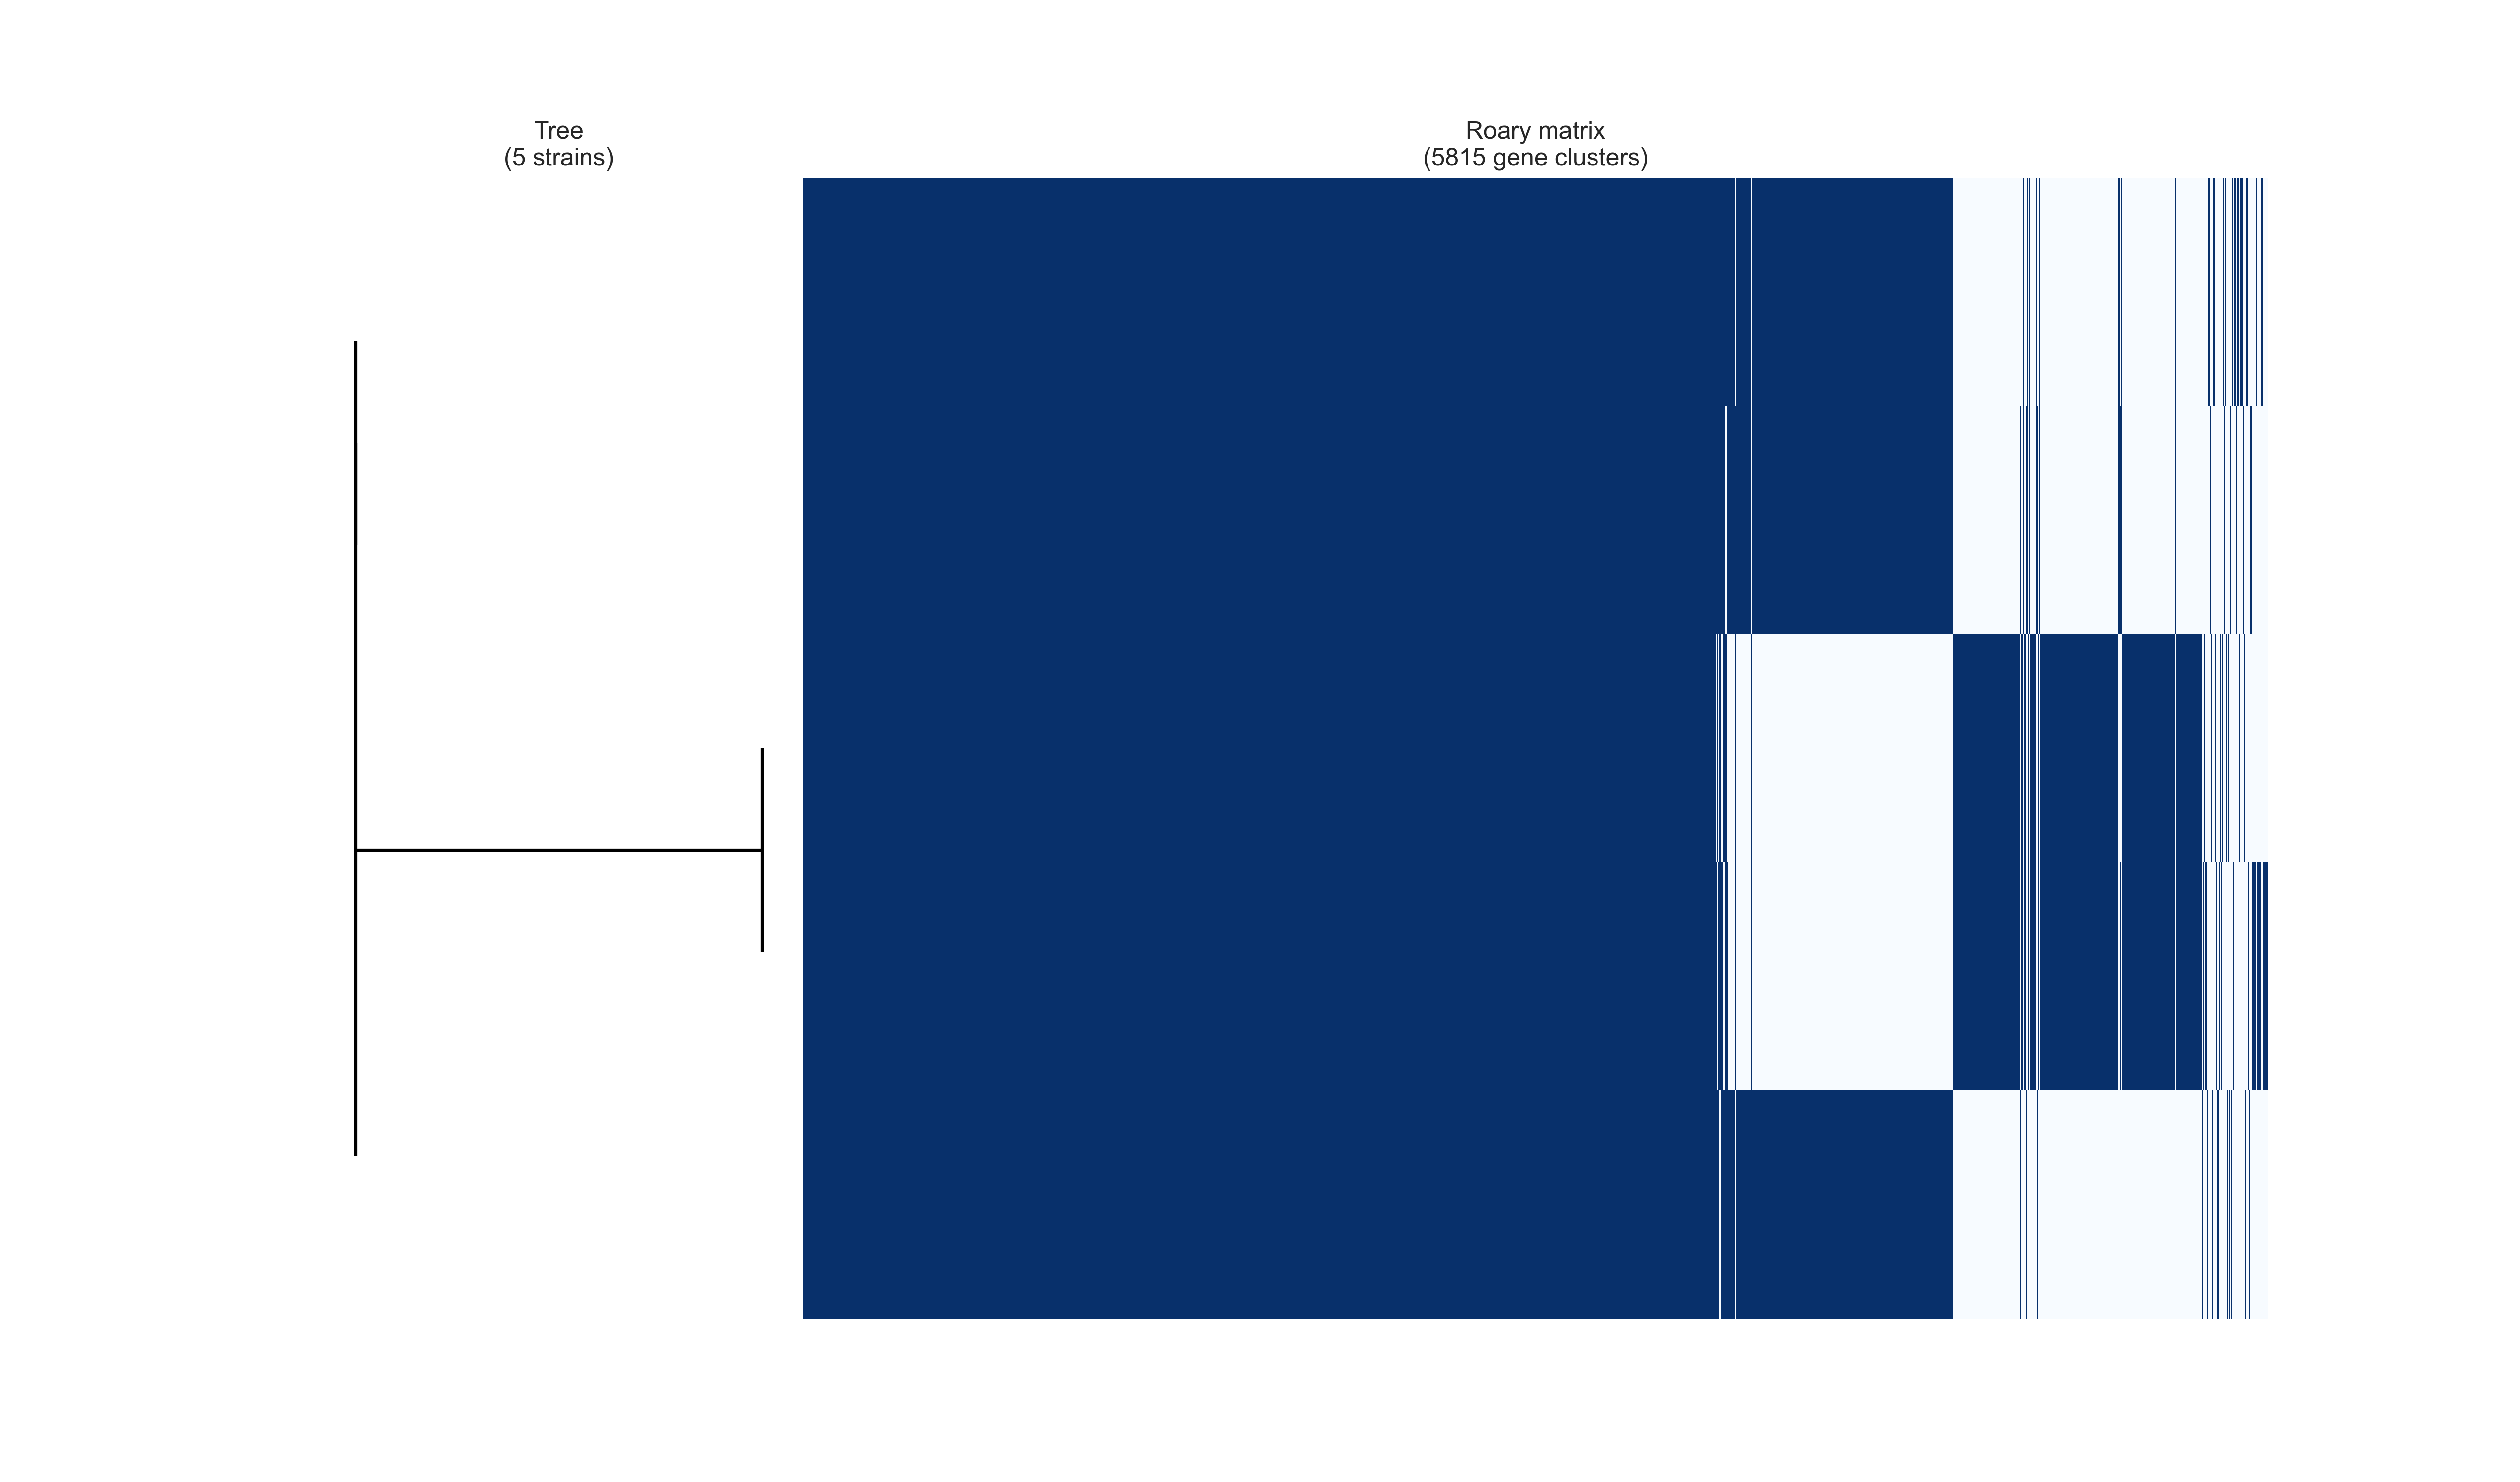

pangenome_matrix.png


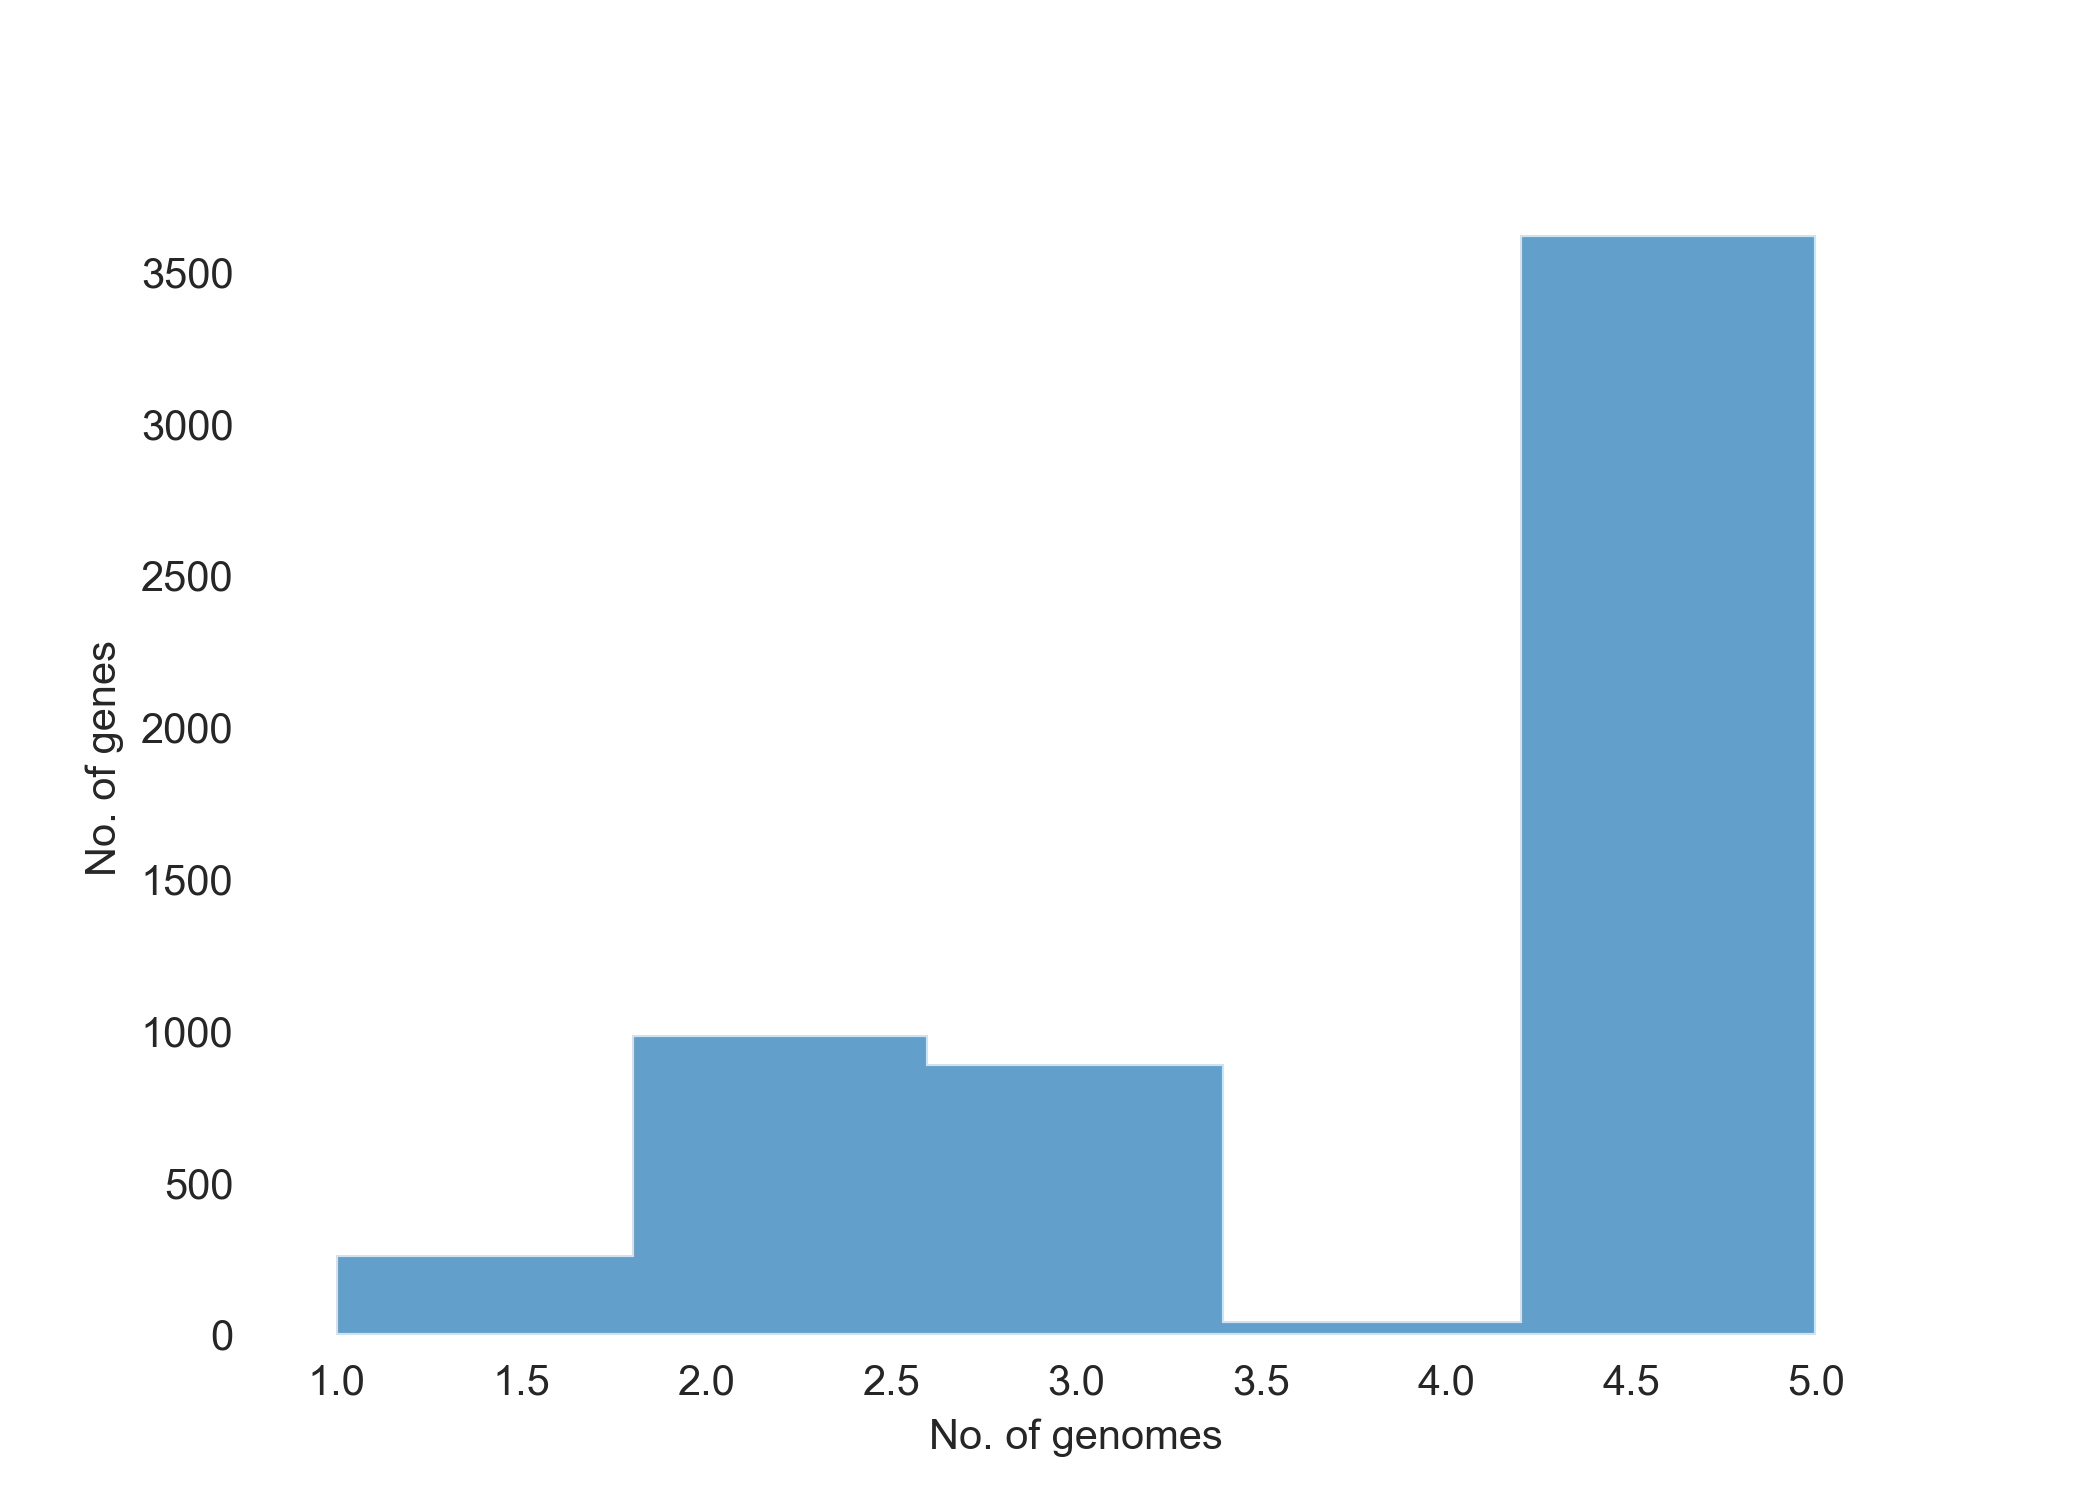

pangenome_frequency.png


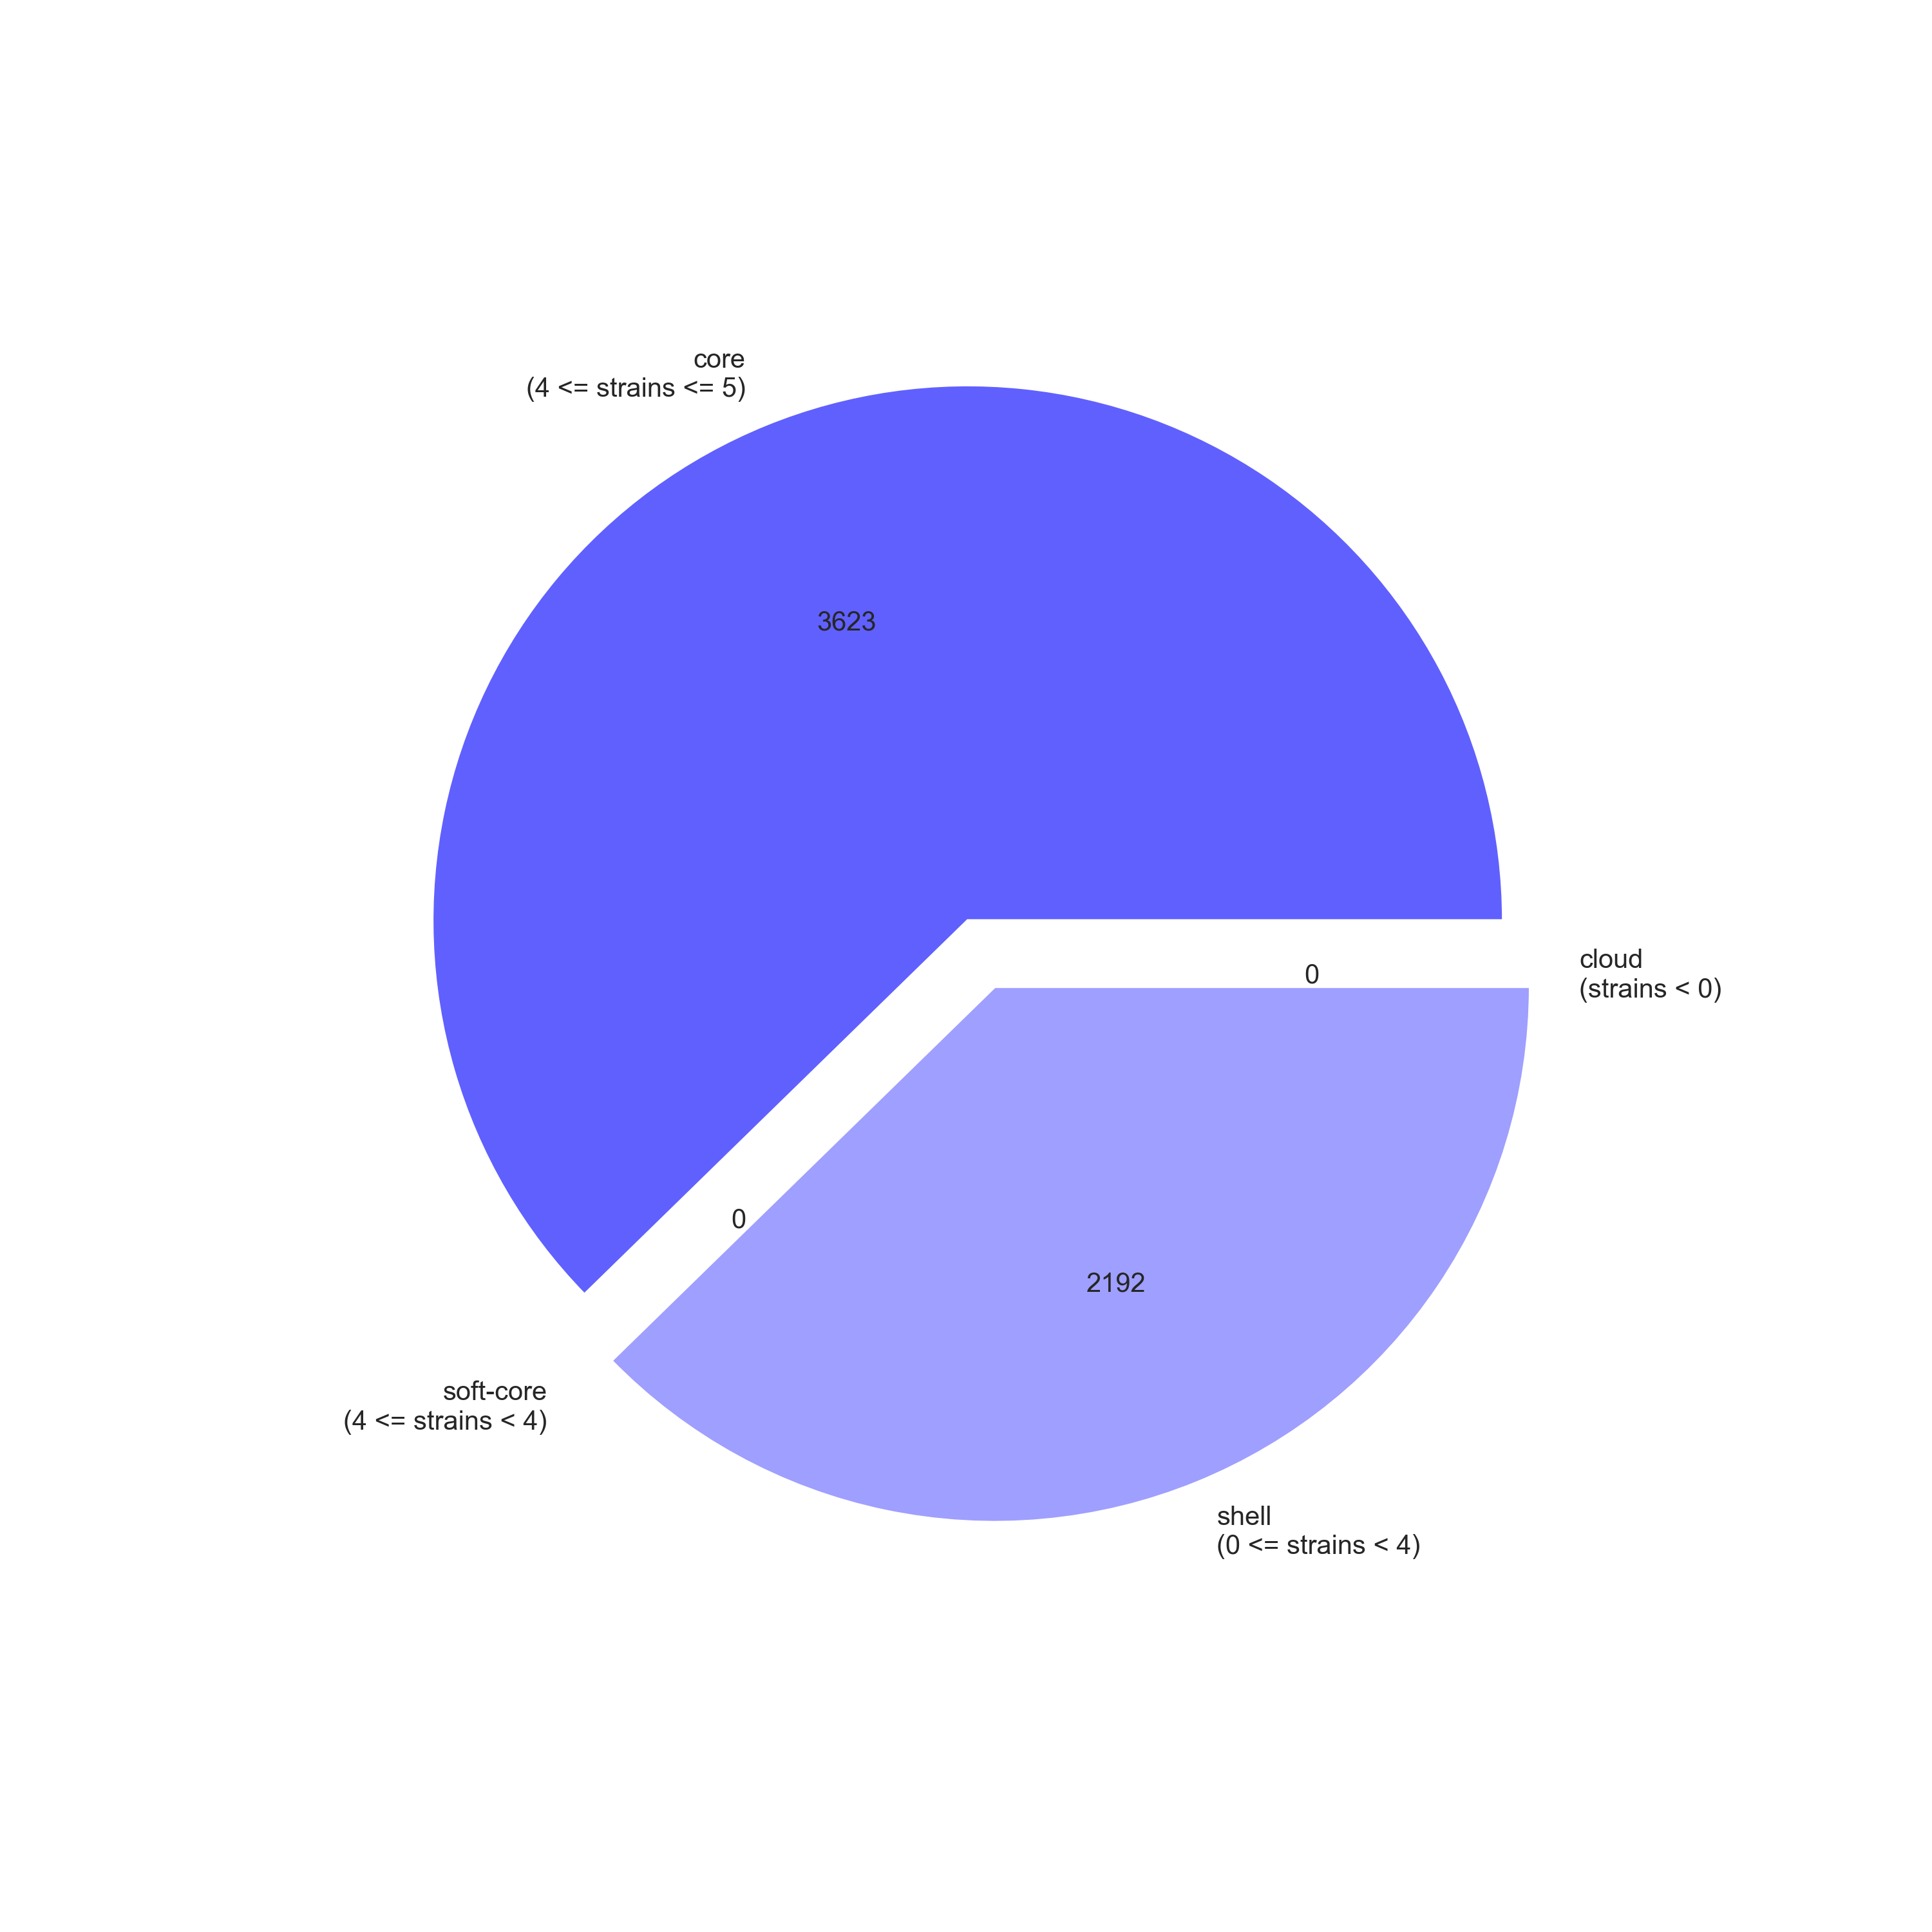

pangenome_pie.png


In [41]:
os.chdir(pwd + "/gff_files/roary")
for imageName in glob('*.png'):
    display(Image(filename=imageName))
    print(imageName)
os.chdir(pwd)

In [ ]:
subprocess.run(f"rm {taxon_file}.json""", shell=True)
!rm accession_list.txt
!rm -r info_table.tsv
#!rm -r gff_files/*
#!rm annotated_genomes/*
subprocess.run(f"rm {taxon_file}.zip""", shell=True)
!rm README.md

In [ ]:
#criteria for genome selection to strict (assembly-source genbank)? draft sequence -> we do annotation right?
#GenomeDiagramm library
#conda the best way?
#voila

#is it possible to have interaction in jupyter notebook
#circos (input-data?)
# download blast - read up on algorithm
#antismash


#1.upload own genome data
#if empty -> trna-scan, barrnap, prodigal (pcap includes them all)
#anvio

In [ ]:
#show html in cell
#%%html
#<iframe src="https://sigmarkarl.github.io/treedraw/#/" width="1200" height="1000"></iframe>